In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import KFold

import re

%matplotlib inline

In [2]:
# Loading the data
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('validation.csv',index_col=0)

In [3]:
train.head()

,USER_ID,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q124742,Q124122,Q123464,Q123621,...,Q99716,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024,Party
1044,1295,1971.0,Female,"$100,001 - $150,000",Married (w/kids),Bachelor's Degree,NaN,Yes,No,No,...,No,No,Yes,No,No,Yes,No,No,Yes,Democrat
2671,3324,1981.0,Female,"$25,001 - $50,000",Married (w/kids),Associate's Degree,NaN,NaN,NaN,NaN,...,No,No,Yes,NaN,No,Yes,NaN,Yes,No,Republican
5549,6939,1999.0,Female,NaN,Single (no kids),Current K-12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democrat
1231,1525,1997.0,Male,"$75,000 - $100,000",Single (no kids),Current K-12,NaN,NaN,NaN,NaN,...,No,Yes,No,No,No,Only-child,No,No,Yes,Democrat
2685,3341,1977.0,Male,"over $150,000",Married (w/kids),Doctoral Degree,No,No,No,Yes,...,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Democrat


In [4]:
train.isnull().sum() #check null

USER_ID               0
YOB                 281
Gender               98
Income              885
HouseholdStatus     389
EducationLevel      735
Q124742            2929
Q124122            2092
Q123464            1963
Q123621            2027
Q122769            1888
Q122770            1770
Q122771            1759
Q122120            1741
Q121699            1567
Q121700            1596
Q120978            1577
Q121011            1545
Q120379            1600
Q120650            1540
Q120472            1636
Q120194            1757
Q120012            1588
Q120014            1726
Q119334            1684
Q119851            1521
Q119650            1635
Q118892            1508
Q118117            1583
Q118232            2039
                   ... 
Q106388            1910
Q106389            1959
Q106042            1884
Q105840            1961
Q105655            1773
Q104996            1798
Q103293            1802
Q102906            1904
Q102674            1954
Q102687            1844
Q102289         

Gender missing values cannot be replaced as they are definite. Drop them

In [5]:
train=train.dropna(subset=['Gender'])
test=test.dropna(subset=['Gender'])

Since there are many rows (limited time) and the yes no ratio may be close we should create another value for null values

In [6]:

train = train.fillna('Other')
test = test.fillna('Other')

In [7]:
drop_elements = ['USER_ID']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [8]:
a=train.columns.tolist()
a.remove('YOB');
a.remove('Gender');
a.remove('Income');
a.remove('HouseholdStatus');
a.remove('EducationLevel');
a.remove('Q122771');
a.remove('Q120472');
a.remove('Q119650');
a.remove('Q120194');
a.remove('Q118232');
a.remove('Q117186');
a.remove('Q117193');
a.remove('Q116881');
a.remove('Q116197');
a.remove('Q115777');
a.remove('Q115899');
a.remove('Q114386');
a.remove('Q113583');
a.remove('Q113584');
a.remove('Q111580');
a.remove('Q110740');
a.remove('Q108950');
a.remove('Q108855');
a.remove('Q108856');
a.remove('Q108342');
a.remove('Q106997');
a.remove('Q102089');
a.remove('Q101162');
a.remove('Q101163');
a.remove('Q99982');
a.remove('Q98059');
a.remove('Party');

for col in a:
        train[col] = train[col].map( {'No': 0, 'Yes': 1,'Other':2} ).astype(int)
        test[col] = test[col].map( {'No': 0, 'Yes': 1,'Other':2} ).astype(int)

In [10]:
test.head()
test.shape


(821, 107)

In [12]:
train['Q122771'] = train['Q122771'].fillna('Other')
test['Q122771'] = test['Q122771'].fillna('Other')
train['Q122771'] = train['Q122771'].map( {'Public': 0, 'Private': 1,'Other':2} ).astype(int)
test['Q122771'] = test['Q122771'].map( {'Public': 0, 'Private': 1, 'Other':2} ).astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [13]:
train['Q120472'] = train['Q120472'].fillna('Other')
test['Q120472'] = test['Q120472'].fillna('Other')
train['Q120472'] = train['Q120472'].map( {'Art': 0, 'Science': 1,'Other':2} ).astype(int)
test['Q120472'] = test['Q120472'].map( {'Art': 0, 'Science': 1, 'Other':2} ).astype(int)

In [14]:

train['Q120194'] = train['Q120194'].fillna('Other')
test['Q120194'] = test['Q120194'].fillna('Other')
train['Q120194'] = train['Q120194'].map( {'Try first': 0, 'Study first': 1,'Other':2} ).astype(int)
test['Q120194'] = test['Q120194'].map( {'Try first': 0, 'Study first': 1, 'Other':2} ).astype(int)

In [15]:

train['Q119650'] = train['Q119650'].fillna('Other')
test['Q119650'] = test['Q119650'].fillna('Other')
train['Q119650'] = train['Q119650'].map( {'Receiving': 0, 'Giving': 1,'Other':2} ).astype(int)
test['Q119650'] = test['Q119650'].map( {'Receiving': 0, 'Giving': 1, 'Other':2} ).astype(int)

In [16]:

train['Q118232'] = train['Q118232'].fillna('Other')
test['Q118232'] = test['Q118232'].fillna('Other')
train['Q118232'] = train['Q118232'].map( {'Pragmatist': 0, 'Idealist': 1,'Other':2} ).astype(int)
test['Q118232'] = test['Q118232'].map( {'Pragmatist': 0, 'Idealist': 1, 'Other':2} ).astype(int)

In [17]:
train['Q117186'] = train['Q117186'].fillna('Other')
test['Q117186'] = test['Q117186'].fillna('Other')
train['Q117186'] = train['Q117186'].map( {'Hot headed': 0, 'Cool headed': 1,'Other':2} ).astype(int)
test['Q117186'] = test['Q117186'].map( {'Hot headed': 0, 'Cool headed': 1, 'Other':2} ).astype(int)

In [18]:
train['Q117193'] = train['Q117193'].fillna('Other')
test['Q117193'] = test['Q117193'].fillna('Other')
train['Q117193'] = train['Q117193'].map( {'Standard hours': 0, 'Odd hours': 1,'Other':2} ).astype(int)
test['Q117193'] = test['Q117193'].map( {'Standard hours': 0, 'Odd hours': 1, 'Other':2} ).astype(int)

In [19]:
train['Q116881'] = train['Q116881'].fillna('Other')
test['Q116881'] = test['Q116881'].fillna('Other')
train['Q116881'] = train['Q116881'].map( {'Happy': 0, 'Right': 1,'Other':2} ).astype(int)
test['Q116881'] = test['Q116881'].map( {'Happy': 0, 'Right': 1, 'Other':2} ).astype(int)

In [20]:
train['Q116197'] = train['Q116197'].fillna('Other')
test['Q116197'] = test['Q116197'].fillna('Other')
train['Q116197'] = train['Q116197'].map( {'P.M.': 0, 'A.M.': 1,'Other':2} ).astype(int)
test['Q116197'] = test['Q116197'].map( {'P.M.': 0, 'A.M.': 1, 'Other':2} ).astype(int)

In [21]:
train['Q115899'] = train['Q115899'].fillna('Other')
test['Q115899'] = test['Q115899'].fillna('Other')
train['Q115899'] = train['Q115899'].map( {'Circumstances': 0, 'Me': 1,'Other':2} ).astype(int)
test['Q115899'] = test['Q115899'].map( {'Circumstances': 0, 'Me': 1, 'Other':2} ).astype(int)

In [22]:
train['Q114386'] = train['Q114386'].fillna('Other')
test['Q114386'] = test['Q114386'].fillna('Other')
train['Q114386'] = train['Q114386'].map( {'TMI': 0, 'Mysterious': 1,'Other':2} ).astype(int)
test['Q114386'] = test['Q114386'].map( {'TMI': 0, 'Mysterious': 1, 'Other':2} ).astype(int)

In [23]:

train['Q113583'] = train['Q113583'].map( {'Tunes': 0, 'Talk': 1,'Other':2} ).astype(int)
test['Q113583'] = test['Q113583'].map( {'Tunes': 0, 'Talk': 1, 'Other':2} ).astype(int)

In [24]:
train['Q113584'] = train['Q113584'].map( {'People': 0, 'Technology': 1,'Other':2} ).astype(int)
test['Q113584'] = test['Q113584'].map( {'People': 0, 'Technology': 1, 'Other':2} ).astype(int)

In [25]:
train['Q111580'] = train['Q111580'].map( {'Supportive': 0, 'Demanding': 1,'Other':2} ).astype(int)
test['Q111580'] = test['Q111580'].map( {'Supportive': 0, 'Demanding': 1, 'Other':2} ).astype(int)

In [26]:
train['Q110740'] = train['Q110740'].map( {'PC': 0, 'Mac': 1,'Other':2} ).astype(int)
test['Q110740'] = test['Q110740'].map( {'PC': 0, 'Mac': 1, 'Other':2} ).astype(int)

In [27]:
train['Q108950'] = train['Q108950'].map( {'Cautious': 0, 'Risk-friendly': 1,'Other':2} ).astype(int)
test['Q108950'] = test['Q108950'].map( {'Cautious': 0, 'Risk-friendly': 1, 'Other':2} ).astype(int)

In [28]:
train['Q108855'] = train['Q108855'].map( {'Yes!': 0, 'Umm...': 1,'Other':2} ).astype(int)
test['Q108855'] = test['Q108855'].map( {'Yes!': 0, 'Umm...': 1, 'Other':2} ).astype(int)

In [29]:
train['Q108856'] = train['Q108856'].map( {'Socialize': 0, 'Space': 1,'Other':2} ).astype(int)
test['Q108856'] = test['Q108856'].map( {'Socialize': 0, 'Space': 1, 'Other':2} ).astype(int)

In [30]:
train['Q108342'] = train['Q108342'].map( {'In-person': 0, 'Online': 1,'Other':2} ).astype(int)
test['Q108342'] = test['Q108342'].map( {'In-person': 0, 'Online': 1, 'Other':2} ).astype(int)

In [31]:
train['Q106997'] = train['Q106997'].map( {'Yay people!': 0, 'Grrr people': 1,'Other':2} ).astype(int)
test['Q106997'] = test['Q106997'].map( {'Yay people!': 0, 'Grrr people': 1, 'Other':2} ).astype(int)

In [32]:
train['Q102089'] = train['Q102089'].map( {'Own': 0, 'Rent': 1,'Other':2} ).astype(int)
test['Q102089'] = test['Q102089'].map( {'Own': 0, 'Rent': 1, 'Other':2} ).astype(int)

In [33]:
train['Q101162'] = train['Q101162'].map( {'Pessimist': 0, 'Optimist': 1,'Other':2} ).astype(int)
test['Q101162'] = test['Q101162'].map( {'Pessimist': 0, 'Optimist': 1, 'Other':2} ).astype(int)

In [34]:
train['Q101163'] = train['Q101163'].map( {'Mom': 0, 'Dad': 1,'Other':2} ).astype(int)
test['Q101163'] = test['Q101163'].map( {'Mom': 0, 'Dad': 1, 'Other':2} ).astype(int)

In [35]:
train['Q99982'] = train['Q99982'].map( {'Nope': 0, 'Check!': 1,'Other':2} ).astype(int)
test['Q99982'] = test['Q99982'].map( {'Nope': 0, 'Check!': 1, 'Other':2} ).astype(int)

In [36]:
train['Q98059'] = train['Q98059'].map( {'Yes': 0, 'Only-child': 1,'Other':2} ).astype(int)
test['Q98059'] = test['Q98059'].map( {'Yes': 0, 'Only-child': 1, 'Other':2} ).astype(int)

In [37]:
train['Party'] = train['Party'].map( {'Democrat': 0, 'Republican': 1} ).astype(int)
test['Party'] = test['Party'].map( {'Democrat': 0, 'Republican': 1} ).astype(int)

In [38]:
train['Gender'] = train['Gender'].map( {'Male': 0, 'Female': 1} ).astype(int)
test['Gender'] = test['Gender'].map( {'Male': 0, 'Female': 1} ).astype(int)

Age by mean


In [39]:
test.head()

,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q124742,Q124122,Q123464,Q123621,Q122769,...,Q99716,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024,Party
1168,1981,0,"$25,001 - $50,000",Married (w/kids),High School Diploma,2,1,1,1,0,...,0,0,1,1,0,0,0,0,1,1
765,1990,0,"under $25,000",Single (no kids),Bachelor's Degree,2,0,0,2,0,...,0,0,0,1,0,0,0,1,1,0
465,1990,1,"under $25,000",Single (no kids),Bachelor's Degree,0,0,0,0,0,...,0,0,1,1,1,0,1,1,0,0
1117,1999,0,Other,Other,Current K-12,2,1,0,2,0,...,0,0,1,0,1,0,0,0,1,0
5371,1990,1,Other,Single (no kids),High School Diploma,1,0,0,1,0,...,2,2,2,2,2,2,2,2,2,1


In [40]:
train['Income'] = train['Income'].map( {'under $25,000': 0, '$25,001 - $50,000': 1, '$50,000 - $74,999': 2, '$75,000 - $100,000': 3, '$100,001 - $150,000': 4,'over $150,000': 5,'Other': 6} ).astype(int)
test['Income'] = test['Income'].map( {'under $25,000': 0, '$25,001 - $50,000': 1, '$50,000 - $74,999': 2, '$75,000 - $100,000': 3, '$100,001 - $150,000': 4,'over $150,000': 5,'Other': 6} ).astype(int)

We are removing Household Status and Education Level

In [41]:
drop_elements = ['HouseholdStatus','EducationLevel']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

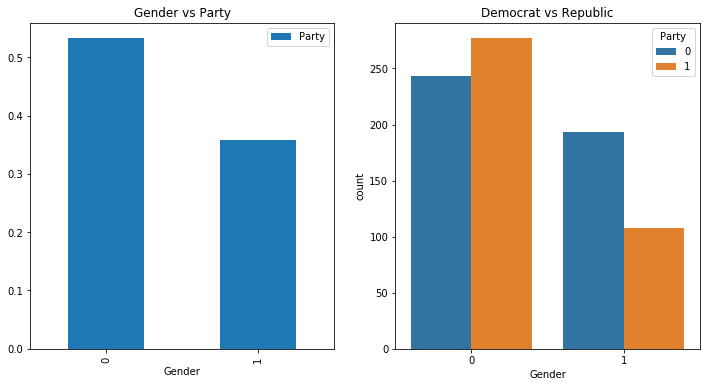

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax=plt.subplots(1,2,figsize=(12,6))
test[['Gender','Party']].groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Gender vs Party')
sns.countplot('Gender',hue='Party',data=test,ax=ax[1])
ax[1].set_title('Democrat vs Republic')
plt.show()

Females vote more for democrat and males for Republic

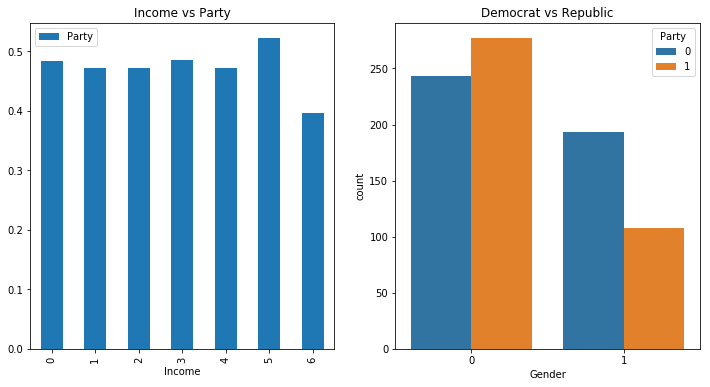

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax=plt.subplots(1,2,figsize=(12,6))
test[['Income','Party']].groupby(['Income']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Income vs Party')
sns.countplot('Gender',hue='Party',data=test,ax=ax[1])
ax[1].set_title('Democrat vs Republic')
plt.show()

Similarly analsye graphs to see which columns are of significant importance.


Due to time constrainsts we will consider all variables

In [44]:
#Check if there are null values left
train.isnull().sum() #check null

YOB        0
Gender     0
Income     0
Q124742    0
Q124122    0
Q123464    0
Q123621    0
Q122769    0
Q122770    0
Q122771    0
Q122120    0
Q121699    0
Q121700    0
Q120978    0
Q121011    0
Q120379    0
Q120650    0
Q120472    0
Q120194    0
Q120012    0
Q120014    0
Q119334    0
Q119851    0
Q119650    0
Q118892    0
Q118117    0
Q118232    0
Q118233    0
Q118237    0
Q117186    0
          ..
Q106388    0
Q106389    0
Q106042    0
Q105840    0
Q105655    0
Q104996    0
Q103293    0
Q102906    0
Q102674    0
Q102687    0
Q102289    0
Q102089    0
Q101162    0
Q101163    0
Q101596    0
Q100689    0
Q100680    0
Q100562    0
Q99982     0
Q100010    0
Q99716     0
Q99581     0
Q99480     0
Q98869     0
Q98578     0
Q98059     0
Q98078     0
Q98197     0
Q96024     0
Party      0
Length: 105, dtype: int64

In [45]:
# Declare key parameters of classifier as Iterables

n_estimators = np.arange(3,55,2)
max_depth = np.arange(1,15,1)
criterion = ['gini', 'entropy']
min_samples_split = np.arange(2,6,1)
min_samples_leaf = np.arange(2,6,1)
random_state = [1337]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}

print(random_grid)

{'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53]), 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5]), 'min_samples_leaf': array([2, 3, 4, 5]), 'random_state': [1337]}


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score

In [47]:
train['Q115777'] = train['Q115777'].map( {'Start': 0, 'End': 1,'Other':2} ).astype(int)
test['Q115777'] = test['Q115777'].map( {'Start': 0, 'End': 1, 'Other':2} ).astype(int)


In [48]:
drop_elements = ['YOB']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [59]:
train_labels = train['Party'].values[:3000]
train_data = train.drop('Party', axis=1).values[:3000]
valid_labels = train['Party'].values[3000:]
valid_data = train.drop('Party', axis=1).values[3000:]

In [60]:
rf = RandomForestClassifier()

# Instantiate Random Search of Parameters using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid, 
                               n_iter=100, 
                               cv=4, 
                               random_state=137)

In [61]:
# Execute training (Fit the random search model)

rf_random.fit(train_data, train_labels) 
print('Done')

Done


In [62]:
test.head()

,Gender,Income,Q124742,Q124122,Q123464,Q123621,Q122769,Q122770,Q122771,Q122120,...,Q99716,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024,Party
1168,0,1,2,1,1,1,0,1,0,0,...,0,0,1,1,0,0,0,0,1,1
765,0,0,2,0,0,2,0,0,1,2,...,0,0,0,1,0,0,0,1,1,0
465,1,0,0,0,0,0,0,1,1,1,...,0,0,1,1,1,0,1,1,0,0
1117,0,6,2,1,0,2,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5371,1,6,1,0,0,1,0,1,1,1,...,2,2,2,2,2,2,2,2,2,1


In [63]:
# Checkout the best set of Parameters
rf_random.best_params_

{'random_state': 1337,
 'n_estimators': 23,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'criterion': 'gini'}

In [64]:
# Get the best estimator
best_rf = rf_random.best_estimator_

In [65]:
# Get the best estimator
best_rf = rf_random.best_estimator_

In [66]:
valid_data.shape

(1634, 103)

In [67]:
# Get a list of predictions on test data for evaluation
predictions = list(best_rf.predict(valid_data))

print('Accuracy:', best_rf.score(valid_data, valid_labels))
print('Precision:', precision_score(list(valid_labels), predictions))
print('Recall:', recall_score(list(valid_labels), predictions))

Accuracy: 0.620563035495716
Precision: 0.6188925081433225
Recall: 0.4960835509138381


In [68]:
train_labels.shape

(3000,)

In [70]:
train_labels1 = train['Party'].values
train_data1 = train.drop('Party', axis=1).values
valid_labels1 = test['Party'].values
valid_data1 = test.drop('Party', axis=1).values

In [71]:
# Declare key parameters of classifier as Iterables

n_estimators = np.arange(3,55,2)
max_depth = np.arange(1,15,1)
criterion = ['gini', 'entropy']
min_samples_split = np.arange(2,6,1)
min_samples_leaf = np.arange(2,6,1)
random_state = [1337]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}

print(random_grid)

{'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53]), 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5]), 'min_samples_leaf': array([2, 3, 4, 5]), 'random_state': [1337]}


In [74]:
rf = RandomForestClassifier()

# Instantiate Random Search of Parameters using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid, 
                               n_iter=100, 
                               cv=4, 
                               random_state=137)

In [75]:
rf_random.fit(train_data, train_labels) 
print('Done')

Done


In [76]:
rf_random.best_params_

{'random_state': 1337,
 'n_estimators': 23,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'criterion': 'gini'}

In [77]:
# Get the best estimator
best_rf = rf_random.best_estimator_

In [78]:
# Get a list of predictions on test data for evaluation
predictions = list(best_rf.predict(valid_data))

print('Accuracy:', best_rf.score(valid_data, valid_labels))
print('Precision:', precision_score(list(valid_labels), predictions))
print('Recall:', recall_score(list(valid_labels), predictions))

Accuracy: 0.620563035495716
Precision: 0.6188925081433225
Recall: 0.4960835509138381
